# Scandinavian Languages Project
By Linnea May, Undergraduate Student, Class of 2021

Published January 2021

This project analyzes the different ways languages can evolve given a certain demographic context. More specifically, it analyzes the differences between the Swedish spoken in Sweden and the Swedish spoken by the ethnic minority group in Finland, also called Finnosvenska. There has been a Swedish-speaking minority in Finland since roughly the 16th century. Because Swedish-speaking Finns form an isolated community, the language has hypothetically changed less than the "mainland" version of Swedish spoken in Sweden.  

To test the hypothesis that Finnosvenska would have experienced less change over time than mainstream Swedish, we compare newspaper articles from Sweden and Finland from the 18th and 19th centuries. While newspapers might not be the largest drivers of change, they demonstrate greater linguistic stability than less formal data sources, such as personal letters or diaries. The [SpråkbankenText](https://spraakbanken.gu.se/en/about/beginners) service hosted by the University of Gothenburg has an extensive collection of newspapers from both Sweden and Finland, which we use for this analysis. 

The analysis is divided into two sections. First, we take a high-level look at the trends across decades for both Swedish and Finnosvenska newspapers. We examine the overall patterns of word usage for each linguistic group to see if they really have evolved in different ways. The second part takes a more granular approach by looking at specific words and see how they are used over time in both the Swedish and Finnish text. By examining specific words, we can begin to hunt down potential cultural influences in the difference between Swedish and Finnosvenska over time. 

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import spatial
from collections import Counter
import os
import pickle
from math import log
import numpy as np
from utils import LanguageCounter
from sklearn.decomposition import PCA
from convertFinnish import buildCounterSwedish
from scipy import stats

base dir is /home/lm686/scandinavian-languages
data dir is /share/magpie/datasets/Swedish
output dir is /home/lm686/scandinavian-languages/data/Finnish/temp_txt
earliest_time is 1740


## 1. The Dataset
The Swedish dataset comes from the [Khubist-2](https://spraakbanken.gu.se/korp/?mode=kubhist#?cqp=%5B%5D&lang=en&corpus=kubhist2-aftonbladet-1830,kubhist2-aftonbladet-1840,kubhist2-aftonbladet-1850,kubhist2-aftonbladet-1860,kubhist2-alfwarochskamt-1840,kubhist2-barometern-1840,kubhist2-barometern-1850,kubhist2-barometern-1860,kubhist2-barometern-1870,kubhist2-barometern-1880,kubhist2-barometern-1890,kubhist2-blekingsposten-1850,kubhist2-blekingsposten-1860,kubhist2-blekingsposten-1870,kubhist2-blekingsposten-1880,kubhist2-bollnastidning-1870,kubhist2-bollnastidning-1880,kubhist2-borastidning-1830,kubhist2-borastidning-1840,kubhist2-borastidning-1850,kubhist2-borastidning-1860,kubhist2-borastidning-1870,kubhist2-borastidning-1880,kubhist2-borastidning-1890,kubhist2-carlscronastidningar-1760,kubhist2-carlscronaswekoblad-1750,kubhist2-carlscronaswekoblad-1760,kubhist2-carlscronaswekoblad-1770,kubhist2-carlscronaswekoblad-1780,kubhist2-carlscronaswekoblad-1790,kubhist2-carlscronaswekoblad-1800,kubhist2-carlscronaswekoblad-1810,kubhist2-carlscronaswekoblad-1820,kubhist2-carlscronaswekoblad-1830,kubhist2-carlscronaswekoblad-1840,kubhist2-carlscronaswekoblad-1850,kubhist2-carlscronaswekoblad-1860,kubhist2-carlscronaswekoblad-1870,kubhist2-dagligtallehanda-1760,kubhist2-dagligtallehanda-1770,kubhist2-dagligtallehanda-1780,kubhist2-dagligtallehanda-1790,kubhist2-dagligtallehanda-1800,kubhist2-dagligtallehanda-1810,kubhist2-dagligtallehanda-1820,kubhist2-dagligtallehanda-1830,kubhist2-dagligtallehanda-1840,kubhist2-dalpilen-1850,kubhist2-dalpilen-1860,kubhist2-dalpilen-1870,kubhist2-dalpilen-1880,kubhist2-dalpilen-1890,kubhist2-fahluweckoblad-1780,kubhist2-fahluweckoblad-1790,kubhist2-fahluweckoblad-1800,kubhist2-fahluweckoblad-1810,kubhist2-fahluweckoblad-1820,kubhist2-falkopingstidning-1850,kubhist2-falkopingstidning-1860,kubhist2-falkopingstidning-1870,kubhist2-falkopingstidning-1880,kubhist2-falkopingstidning-1890,kubhist2-faluposten-1860,kubhist2-faluposten-1870,kubhist2-faluposten-1880,kubhist2-faluposten-1890,kubhist2-folketsrost-1840,kubhist2-folketsrost-1850,kubhist2-folketsrost-1860,kubhist2-ghost-1830,kubhist2-gotheborgsallehanda-1800,kubhist2-gotheborgsallehanda-1810,kubhist2-gotheborgsallehanda-1820,kubhist2-gotheborgsallehanda-1830,kubhist2-gotheborgskanyheter-1800,kubhist2-gotheborgskanyheter-1810,kubhist2-gotheborgskanyheter-1820,kubhist2-gotheborgskanyheter-1830,kubhist2-inrikestidningar-1800,kubhist2-inrikestidningar-1810,kubhist2-inrikestidningar-1820,kubhist2-lundsweckoblad-1810,kubhist2-lundsweckoblad-1820,kubhist2-lundsweckoblad-1830,kubhist2-malmoallehanda-1820,kubhist2-malmoallehanda-1830,kubhist2-malmoallehanda-1840,kubhist2-malmoallehanda-1850,kubhist2-malmoallehanda-1860,kubhist2-malmoallehanda-1870,kubhist2-malmoallehanda-1880,kubhist2-malmoallehanda-1890,kubhist2-nerikesallehanda-1840,kubhist2-nerikesallehanda-1850,kubhist2-nerikesallehanda-1860,kubhist2-nerikesallehanda-1870,kubhist2-nerikesallehanda-1880,kubhist2-nerikesallehanda-1890,kubhist2-nlk-1850,kubhist2-nlk-1860,kubhist2-nlk-1870,kubhist2-norden-1850,kubhist2-norden-1860,kubhist2-norraskane-1880,kubhist2-norraskane-1890,kubhist2-norrkopingstidningar-1800,kubhist2-norrkopingstidningar-1810,kubhist2-norrkopingstidningar-1820,kubhist2-norrkopingstidningar-1830,kubhist2-nyttochgammalt-1800,kubhist2-nyttochgammalt-1810,kubhist2-ostgotacorrespondenten-1830,kubhist2-post-ochinrikestidningar-1820,kubhist2-post-ochinrikestidningar-1830,kubhist2-posttidningar-1800,kubhist2-posttidningar-1810,kubhist2-posttidningar-1820,kubhist2-stockholmsdagblad-1820,kubhist2-stockholmsdagblad-1830,kubhist2-stockholmsposten-1800,kubhist2-stockholmsposten-1810,kubhist2-stockholmsposten-1820,kubhist2-stockholmsposten-1830,kubhist2-vestmanlandslanstidning-1830,kubhist2-wexjobladet-1810,kubhist2-wexjobladet-1820,kubhist2-wexjobladet-1830,kubhist2-wexjobladet-1840,kubhist2-wexjobladet-1850) corpus hosted on SpråkbankenText. The newspapers span from 1750 to 1890 and come from various regions in southern Sweden, where the majority of the population is located. Due to size contraints and the much larger sample size of newspapers in Sweden, we take only a sampling of the available newspapers. 

The Finnish dataset comes from [Nationalbibliotekets svenskspråkiga tidningar](https://korp.csc.fi/korp/?mode=swedish#?lang=en&stats_reduce=word&cqp=%5B%5D&corpus=klk_sv_1948,klk_sv_1947,klk_sv_1946,klk_sv_1945,klk_sv_1944,klk_sv_1943,klk_sv_1942,klk_sv_1941,klk_sv_1940,klk_sv_1939,klk_sv_1938,klk_sv_1937,klk_sv_1936,klk_sv_1935,klk_sv_1934,klk_sv_1933,klk_sv_1932,klk_sv_1931,klk_sv_1930,klk_sv_1929,klk_sv_1928,klk_sv_1927,klk_sv_1926,klk_sv_1925,klk_sv_1924,klk_sv_1923,klk_sv_1922,klk_sv_1921,klk_sv_1920,klk_sv_1919,klk_sv_1918,klk_sv_1917,klk_sv_1916,klk_sv_1915,klk_sv_1914,klk_sv_1913,klk_sv_1912,klk_sv_1911,klk_sv_1910,klk_sv_1909,klk_sv_1908,klk_sv_1907,klk_sv_1906,klk_sv_1905,klk_sv_1904,klk_sv_1903,klk_sv_1902,klk_sv_1901,klk_sv_1900,klk_sv_1899,klk_sv_1898,klk_sv_1897,klk_sv_1896,klk_sv_1895,klk_sv_1894,klk_sv_1893,klk_sv_1892,klk_sv_1891,klk_sv_1890,klk_sv_1889,klk_sv_1888,klk_sv_1887,klk_sv_1886,klk_sv_1885,klk_sv_1884,klk_sv_1883,klk_sv_1882,klk_sv_1881,klk_sv_1880,klk_sv_1879,klk_sv_1878,klk_sv_1877,klk_sv_1876,klk_sv_1875,klk_sv_1874,klk_sv_1873,klk_sv_1872,klk_sv_1871,klk_sv_1870,klk_sv_1869,klk_sv_1868,klk_sv_1867,klk_sv_1866,klk_sv_1865,klk_sv_1864,klk_sv_1863,klk_sv_1862,klk_sv_1861,klk_sv_1860,klk_sv_1859,klk_sv_1858,klk_sv_1857,klk_sv_1856,klk_sv_1855,klk_sv_1854,klk_sv_1853,klk_sv_1852,klk_sv_1851,klk_sv_1850,klk_sv_1849,klk_sv_1848,klk_sv_1847,klk_sv_1846,klk_sv_1845,klk_sv_1844,klk_sv_1843,klk_sv_1842,klk_sv_1841,klk_sv_1840,klk_sv_1839,klk_sv_1838,klk_sv_1837,klk_sv_1836,klk_sv_1835,klk_sv_1834,klk_sv_1833,klk_sv_1832,klk_sv_1831,klk_sv_1830,klk_sv_1829,klk_sv_1828,klk_sv_1827,klk_sv_1826,klk_sv_1825,klk_sv_1824,klk_sv_1823,klk_sv_1822,klk_sv_1821,klk_sv_1820,klk_sv_1819,klk_sv_1818,klk_sv_1817,klk_sv_1816,klk_sv_1815,klk_sv_1814,klk_sv_1813,klk_sv_1812,klk_sv_1811,klk_sv_1810,klk_sv_1809,klk_sv_1808,klk_sv_1807,klk_sv_1806,klk_sv_1805,klk_sv_1804,klk_sv_1803,klk_sv_1802,klk_sv_1801,klk_sv_1800,klk_sv_1799,klk_sv_1798,klk_sv_1797,klk_sv_1796,klk_sv_1795,klk_sv_1794,klk_sv_1793,klk_sv_1792,klk_sv_1791,klk_sv_1789,klk_sv_1785,klk_sv_1784,klk_sv_1783,klk_sv_1782,klk_sv_1778,klk_sv_1777,klk_sv_1776,klk_sv_1775,klk_sv_1774,klk_sv_1773,klk_sv_1772,klk_sv_1771) corpus. This is a comprehensive dataset of newspapers from Finnosvenska newspapers in Finland from 1770 to 1900. 

While not all data can be made public, the Swedish data can be downloaded and processed using the following commands. Data from more decades can be downloaded and processed from [here](https://spraakbanken.gu.se/lb/resurser/meningsmangder/).

In [2]:
! wget -P test/ https://spraakbanken.gu.se/lb/resurser/meningsmangder/kubhist2-carlscronaswekoblad-1750.xml.bz2 
! bzip2 -d test/kubhist2-carlscronaswekoblad-1750.xml.bz2
! pwd
buildCounterSwedish("./test", "./test")

--2021-01-07 15:23:41--  https://spraakbanken.gu.se/lb/resurser/meningsmangder/kubhist2-carlscronaswekoblad-1750.xml.bz2
Resolving spraakbanken.gu.se (spraakbanken.gu.se)... 130.241.42.13
Connecting to spraakbanken.gu.se (spraakbanken.gu.se)|130.241.42.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2733534 (2.6M) [application/x-bzip2]
Saving to: ‘test/kubhist2-carlscronaswekoblad-1750.xml.bz2’

100%[======================================>] 2,733,534   3.01MB/s   in 0.9s   

2021-01-07 15:23:43 (3.01 MB/s) - ‘test/kubhist2-carlscronaswekoblad-1750.xml.bz2’ saved [2733534/2733534]

/home/lm686/scandinavian-languages
Parsing Swedish to txt: kubhist2-carlscronaswekoblad-1750.xml
finished counter:  [('och', 1993), ('med', 806), ('til', 674), ('jag', 551), ('som', 550), ('för', 443), ('mig', 374), ('dito', 367), ('denna', 303), ('hos', 300), ('det', 298), ('den', 294), ('dal', 283), ('ifrån', 282), ('lil', 269), ('min', 241), ('sig', 224), ('samt', 212), ('weka'

After processing the newpapsers into raw data, we represent each corpus as an object of the `LanguageCounter` object, which is defined in `utils.py`. Each object stores the words and their frequencies across decades. This representation saves only the word counts across decades and across languages. After processing, we have over 2GB of raw data. Later analysis could look at the grammatical structure of the texts, but for now we look at the different trends in word usage across languages. 

In [3]:
print(LanguageCounter.__doc__)

 Class used to represent each corpus. 
    ...
    Attributes
    ----------
    dataPath: str
        Path to the directory that contains the pickled raw text for each newspaper. 
    allCounters: Dict[np.datetime64, Counter]
        A mapping from decade to a counter of each word in the newspaper publishings for that decade. 
    commonWords: Dict[np.datetime64, list[str]]
        A mapping from decade to the top 100 most commonly used words used in that decade. 
    topWordsTotal: Counter
        The top 250 words used across all time by the newspapers and their overall frequncies. 
    allFeatized: List[List[float]]
        A list of 250-dimensional vectors, one for each decade of the corpus. Vectors show the frequencies of each of the topWordsTotal within that decade.
    
    Methods
    -------
    buildCommonCounters(dataPath)
        For every pickle file in dataPath, adds a counter for the given decade to self.allCounters
    getOverlaps()
        Get the amount of word overl

In [4]:
finCountSource = "data/Finnish/temp_txt"
sweCountSource = "data/Swedish/"

fin = LanguageCounter(finCountSource)
fin.buildCommonCounters(fin.dataPath)

swe = LanguageCounter(sweCountSource)
swe.buildCommonCounters(swe.dataPath)

finYears = list(fin.allCounters.keys())
sweYears = list(swe.allCounters.keys())

## 2.  Quantitative Trends
First we take a look at the overall trends across decades for each language. This well help us get a better understanding for each language and confirm that there actually are differences in how Finnosvenska and Swedish have evolved. 

To do this, we start by quantifying whole decades of publishing in each language and then look for trends in our new representation of the text. We follow the same process as Grant Storey and David Mimno in their article ["Like Two Pis in a Pod: Author Similarity Across Time in the Ancient Greek Corpus"](https://culturalanalytics.org/article/13680-like-two-pis-in-a-pod-author-similarity-across-time-in-the-ancient-greek-corpus) where we represent decades through the use of high frequency words. The `buildFeatures` method will find the top 250 most frequently used words. We repeat this process for both Finnosvenska and Swedish. Given a decade $d$ in a lanugage $l$, we can then build a 250-dimensional vector $x$ where each element of the vector $x_i$ is the frequency of the $i$th most common word across all time, within that decade. For example, suppose we have a feature vector for the decade 1800 in the Swedish-language text and the first element of the vector has a value of 0.02. This means that the first of the top 250 words has a makes up 2% of the words used in Swedish newspapers in 1800. 

Top word frequency has been used as a reliable way to quantify an author's unique signature in the past. This is because an author's subconscious characteristics can influence the ratio of commonly-used words. In this project, the "authors" are snapshots of each linguistic group by decade of publishing. By looking at top word frequency over time, we can build a "signature" of each linguistic group and see how it evolves over time.

In [ ]:
fin.buildFeatures()
swe.buildFeatures()

As noted in the class docstring above, the `buildFeatures` method will find the top 250 words across all texts for a given language using `Counter` objects that implement the object's bookkeeping for words and their frequencies. The method will only add words that occur in more than half of all decades, which is supposed to control for any one decade that might dominate in using a certain word. There were no words that met this criteria in our corpora, so the feature vectors are build with the top 250 most frequenly used words across all decades. 

### 2.1 Linguistic Divergence over Time
The first way we'll use these feature vectors is to look at how they diverge over time. Below, we use the cosine distance of two feature vectors to measure the similarity between the corresponding two decades in a given language. To look at the divergence of each language, we calculate cosine distance of each decade with respect to the first decade of publishing in each language. For Finnosvenska, we calculate the simliarity of each decade with the feature vector that describes all articles published in 1760. We do the same with all Swedish texts, only the data starts two decades earlier in 1740. 

The graph below shows the cosine distance for each decade with respect to the first decade of publishing. As the languages begin to diverge, the distance between decades grows and a positive trend appears. However, we can see from the more positive trend that Swedish diverges more and at a faster pace than Finnosvenska. This is our first confirmation that the Swedish language changes more than its Finnosvenska counterpart. 

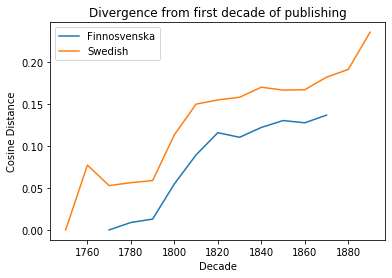

In [9]:
similarity = [spatial.distance.cosine(fin.allFeatize[0], fin.allFeatize[i]) for i in range(len(fin.allFeatize))]
plt.plot(finYears, similarity, label="Finnosvenska")
similarity = [spatial.distance.cosine(swe.allFeatize[0], swe.allFeatize[i]) for i in range(len(swe.allFeatize))]
plt.plot(sweYears, similarity, label="Swedish")
plt.xlabel("Decade")
plt.ylabel("Cosine Distance")
plt.title("Divergence from first decade of publishing")
plt.legend()
plt.show()

### 2.2 Comparing Finnosvenska and Swedish Evolution

In the previous section, we computed the top 250 words for each langauge individually. This means that the feature vectors lived in different vector spaces for each langauge. Here, we build shared feature vectors by computing the top 250 words across both languages. Now, the feature vectors for each decade across Finnosvenska and Swedish texts can be directly compared. To do so, we project the 250-dimension vectors into 2D space using PCA. PCA works by finding the directions in the 250-dimensional space that capture the most variability in the dataset. The two dimensions remaining capture the greatest variance in the vectors and allow us to make a visual inspection of the relationship between decades and language, which we conduct below. 

In [14]:
# Find top 250 most frequent words across both langauges, based on frequency
totalSwed = sum([topWord[1] for topWord in swe.topWordsCounter])
freqsSwed = []
for topWord in swe.topWordsCounter:
    freqsSwed += [(topWord[0], topWord[1]/totalSwed)]
    
totalFin = sum([s[1] for s in fin.topWordsCounter])
freqsFin = []
for topWord in fin.topWordsCounter:
    freqsFin += [(topWord[0], topWord[1]/totalFin)]

# Build a Counter that combines the frequences from both languages
combined = Counter()
for word in freqsSwed: 
    combined[word[0]] += word[1]
for word in freqsFin: 
    combined[word[0]] += word[1]
    
# Based on the top 250 shared words, build the vector of frequencies for each decade
sweAllFeatize = []
for counter in list(swe.allCounters.values()):
    lenDoc = sum(counter.values())
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    sweAllFeatize += [featize]
    
finAllFeatize = []
for counter in list(fin.allCounters.values()):
    lenDoc = sum(counter.values())
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    finAllFeatize += [featize]

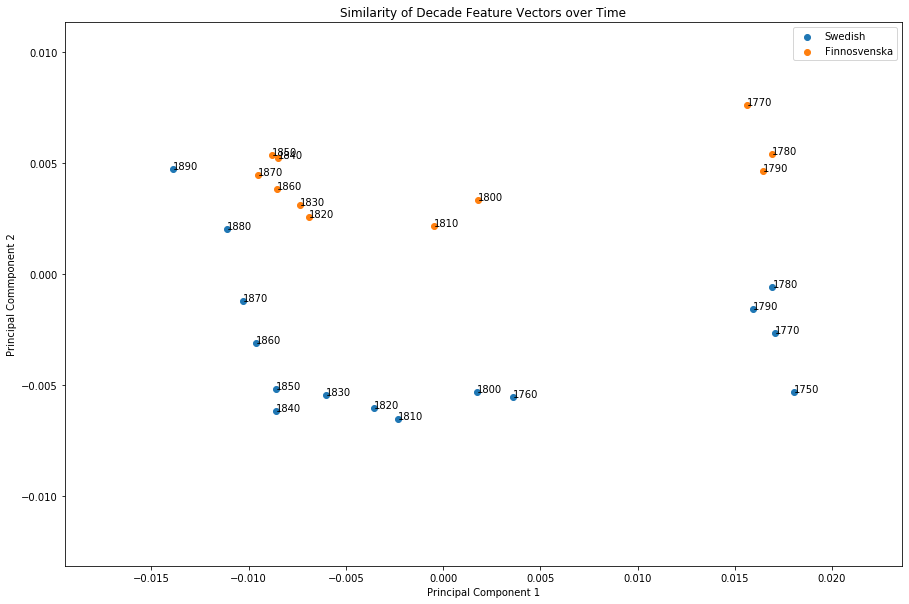

In [17]:
pca = PCA(n_components=4)
pca_result= pca.fit_transform(sweAllFeatize + finAllFeatize)
numSweDecades = len(sweAllFeatize)

x_swe = pca_result[:numSweDecades, 0]
x_fin = pca_result[numSweDecades:,0]
y_swe = pca_result[:numSweDecades,1]
y_fin = pca_result[numSweDecades:,1]

plt.figure(figsize=(15,10))
plt.scatter(x_swe, y_swe, label="Swedish")
for i in range(len(list(swe.allCounters.keys()))):
    plt.annotate(list(swe.allCounters.keys())[i], (x_swe[i], y_swe[i]))
    
plt.scatter(x_fin, y_fin, label="Finnosvenska")
for i in range(len(list(fin.allCounters.keys()))):
    plt.annotate(list(fin.allCounters.keys())[i], (x_fin[i], y_fin[i]))
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Commponent 2")
plt.title("Similarity of Decade Feature Vectors over Time")
plt.show()

There are a few trends that we can analyze within the above graph. First, we see that in both Finnosvenska and Swedish, the 18th century decades seem to be oddballs. They are both off to the left hand side of the graph, with the Finnosvenska points being slightly tighter than the Swedish decades. Many language corpora show this trend of the oldest publications being the most different, likely due to the modernization that would come in later years. However it's also important to note that the Optical Character Recongition (OCR) system used to create both corpora is nowhere near as effective for earlier years, meaning there could simply be more noise in the early decades that create excessive differences in their contents. However, the effects of the limited OCR should be mitigated here because we are using only the top 250 most common words, which would likely have a better OCR success rate. Curiously, the one exception to this trend is the 1760 decade in Swedish texts, which is cloer to later publishings. 

The next trend is the clear progression of both languages towards more negative principal component 1 values over time. There's no exact interpretation for what a more negative PC1 value means, but we can look at the relative changes all the same. This suggest some sort of common linguistic evolution, although once again Finnovsenka texts seems to exhibit less rapid changes. The Finnosvenska texts also exhibit less variance in the second principal component. A more detailed analysis of the word choice causing this evolution is the next step towards understanding this common trend, and as such we turn to analyzing specific words in the next section. 

# 3. Word Analysis

Now that we've analyzed the broader trends of the texts, we'll look at specific words and see how their usage over time compares across langauges. This will provide a more detailed analysis of the cultural differences between the languages. 

## 3.1 Words Unique to Each Corpus
The simplest place to start is to look at words that occur in Finnosvenska texts but not Swedish texts, and vice versa. This is a good indicator of what topics each linguistic group might focus on that the other doesn't. A lot of cities in each country (Sweden vs. Finland) show up in the following lists. Some examples incldue: 
* __Cities__: Helsignfors (the Swedish name for Helsinki) and Malmö are cities in Finland and Sweden, respectively, and don't show up in the other corpus. 
* __Historical Ties__: The Finnosvenska texts mentions the Russian city of St. Petersburg, which makes sense considering Finland's historical ties to Russia.
* __Currency__: The Swedish kronor (the name of the Swedish currency) is mentioned only in the Swedish text. 

In [30]:
fin.topWordsTotal = [s.lower() for s in fin.topWordsTotal]
print("In Finnosvenska but not Swedish: \n\t", set(fin.topWordsTotal).difference(swe.topWordsTotal))
print("\nIn Swedish but not Finnosvenska: \n\t", set(swe.topWordsTotal).difference(fin.topWordsTotal))

In Finnosvenka but not Swedish: 
	 {'gjort', 'stad', 'mark', 'gar', 'hvilket', 'helsingfors', 'huru', 'namn', 'regeringen', 'denne', 'land', 'afseende', 'böra', 'emedan', 'åter', 'finland', 'kop', 'finlands', 'måste', 'vill', 'bet', 'london', 'ganska', 'manad', 'åbo', 'alltid', 'voro', 'sådant', 'sta', 'ifrån', 'gärden', 'wasa', 'mcd', 'sade', 'vore', 'densamma', 'län', 'for', 'penni', 'finska', 'emellan', 'landet', 'också', 'amp', 'fom', 'wiborg', 'äbo', 'petersburg', 'abo', 'johan', 'dig', 'först', 'lör', 'borde', 'fall'}

In Swedish but not Finnosvenka: 
	 {'parti', 'herrar', 'goda', 'kronor', 'fru', 'stadens', 'salu', 'billiga', 'dito', 'mäste', 'december', 'härmed', 'godt', 'finnas', 'hwilket', 'nied', 'andersson', 'ocb', 'carlskrona', 'norra', 'oktober', 'rdr', 'härstädes', 'öre', 'son', 'flera', 'undertecknad', 'kök', 'januari', 'priser', 'emellertid', 'månad', 'hyra', 'kapten', 'derefter', 'göteborg', 'ooh', 'huset', 'nästkommande', 'norrköpings', 'nägon', 'februari', 'afton', 

## 3.2 Finnish Loanwords



To get a little deeper into the linguistic differences, we look at Finnish words that have been adopted by the Swedish language. We hypothesize that these Finnish loanwords would see greater use in Finnosvenska texts due to the geopgrahic proximity of the group to Finnish speakers (in fact, many Swedish-speaking Finns are likely fluent in Finnish as well). To measure this trend, we look at the relative frequency per 100,000 words of these loanwords across all time for both languages. To see if the frequency of words are statistically significant across Finnosvenska and Swedish texts, we perform a [G-test](https://en.wikipedia.org/wiki/G-test) that calculate the probability of the frequencies of a loanword being different across langauges, given the null hypothesis that their frequencies are similar in each language. A value of `p < 0.05 ` allows us to reject the null hypothesis and indicates that there is a statistically significant difference in the way both languages use a given loanword. 

In [46]:
sweWordCount = sum([sum(c.values()) for c in swe.allCounters.values()])
finWordCount = sum([sum(c.values()) for c in fin.allCounters.values()]) 

def getFrequenciesLog(candidates):
    for cand in candidates: 
        finCount = sum([c[cand] for c in fin.allCounters.values()])
        sweCount = sum([c[cand] for c in swe.allCounters.values()])
        finTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
        sweTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
        finFreq = (log(finCount+1)-log(finTotal))
        sweFreq = (log(sweCount+1)-log(sweTotal))

        print("Finnish loanword freq {:s}: \tFinnish: {:4f} \tSwedish: {:4f} \t [{:s}]".format(
            cand, finFreq, sweFreq, str(finFreq > sweFreq)
        ))
        
def getFreqsDict(candidates):
    candidates_d = {k: [] for k in candidates}
    for i, cand in enumerate(candidates): 
        finCount = [c[cand] for c in fin.allCounters.values()]
        sweCount = [c[cand] for c in swe.allCounters.values()]
        finTotal = [sum(c.values()) for c in fin.allCounters.values()]
        sweTotal = [sum(c.values()) for c in fin.allCounters.values()]
        finFreqs = [(c[cand])/(sum(c.values()))*100000 for c in fin.allCounters.values()]
        sweFreqs = [(c[cand])/(sum(c.values()))*100000 for c in swe.allCounters.values()]

        # Average these frequences across all years
        finFreq = sum( [(c[cand]) / (sum(c.values()))*100000 for c in fin.allCounters.values()]) / len(fin.allCounters)
        sweFreq = sum([(c[cand])/(sum(c.values()))*100000 for c in swe.allCounters.values()]) / len(swe.allCounters)
        candidates_d[cand] = (finFreqs, sweFreqs)
        
        # https://wordhoard.northwestern.edu/userman/analysis-comparewords.html
        a, b = sum(finCount), sum(sweCount)
        c, d = sum(finTotal), sum(sweTotal)
        e1 = c * (a + b) / (c + d)
        e2 = d * (a + b) / (c + d)
        G2 = 2* (a * np.log(a / e1) + b * np.log(b / e2))
        p = 1 - stats.chi2.cdf(G2, 1)
        # print("G^2 Stat: ", G2)    
        
        print("{}. Finnish loanword {:s}: \tFinnish: {:4f} \tSwedish: {:4f} \t{}".format(
            i+1, cand, finFreq, sweFreq, "Signfinicant!" if p< 0.05 else ""
        ))
    return candidates_d

In [50]:
cand_freqs = getFreqsDict(["kola", "kova", "pulka", "memma"])

1. Finnish loanword kola: 	Finnish: 0.620426 	Swedish: 0.469006 	Signfinicant!
2. Finnish loanword kova: 	Finnish: 0.011458 	Swedish: 0.010739 	Signfinicant!
3. Finnish loanword pulka: 	Finnish: 0.013246 	Swedish: 0.005780 	Signfinicant!
4. Finnish loanword memma: 	Finnish: 0.036777 	Swedish: 0.000000 	


/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


1. __Kola__ : translated as "to die." Adapted from the Finnish word "kuolla," this is the most common loanword across both languages. 
2. __Kova__: translated as "money." Originally from a Finnish expression "kova raha" meaning coins.
3. __Pulka__: translated as "sled." Orignally from a Finnish and Sami (an indigenous group that lives in the north of both countries) word "pulkka". 
4. __Memma__: a traditional Finnish Easter pudding, originally called "mämmi" in Finnish. The dessert has supposedly begun to be exported to Sweden, although the frequencies of the word in either corpus can't back up that statement. 

<p align="center" style='text-align:center;font-style:italic'>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/M%C3%A4mmi_Kymppi.jpg/584px-M%C3%A4mmi_Kymppi.jpg" width='100' style='display:block;margin:auto'>
    The traditional mämmi dessert. 
</p>


### 3.3 Tracking the Usage of Loanwords
As section 3.2 shows, there are Finnish loanwords that are statistically signifcant in their usage across Finnosvenska and Swedish text. We now pick a few loanwords and track their usage over time to attempt to identify trends in usage between Finnosvenska and Swedish text. 

#### 3.3.1 Kola: 
The word "kola" (to die) is the most common loanword across both texts. Other than a curious spike right at the beginning, Swedish texts seem to use the word less frequently than Finnosvenska texts. Around the 1850s, usage of the word peaks in Finnosvenska texts. A few decades later, the usage of the word in Swedish texts starts to increase as well. The word has other usages in Swedish, including "toffee," so a more detailed analysis of the context of this word would be necessary to tease apart possible differences in the word meaning. 
[(_wiktionary_)](https://en.wiktionary.org/wiki/kola#Swedish)

1. Finnish loanword kola: 	Finnish: 0.620426 	Swedish: 0.469006 	Signfinicant!


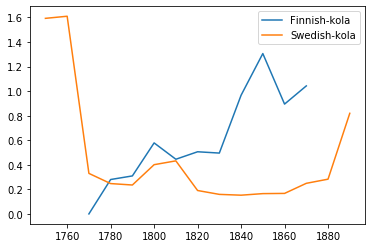

In [54]:
candidates_d = getFreqsDict(["kola"])

plt.plot(finYears, candidates_d['kola'][0], label="Finnish-kola") 
plt.plot(sweYears, candidates_d['kola'][1], label="Swedish-kola")
plt.legend()

#### 3.3.2 Kova vs. Raha
Kova is the loanword that means "money" ("raha" in Finnish), derived from the Finnish phrase "kova raha" that originally means "coins" [(_quora_)](https://www.quora.com/Could-someone-point-to-Finnish-influences-in-the-Swedish-language). In order to test the hypothesis that Finnosvenska texts might directly take Finnish words as well as create loanwords to Swedish, we compare the usage of the words raha and kova. 

/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


1. Finnish loanword raha: 	Finnish: 0.012326 	Swedish: 0.000000 	
2. Finnish loanword kova: 	Finnish: 0.011458 	Swedish: 0.010739 	Signfinicant!


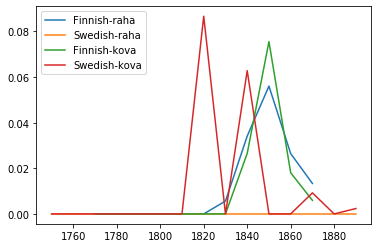

In [55]:
candidates_d = getFreqsDict(["raha", "kova"])
plt.plot(finYears, candidates_d['raha'][0], label="Finnish-raha")
plt.plot(sweYears, candidates_d['raha'][1], label="Swedish-raha")
plt.plot(finYears, candidates_d['kova'][0], label="Finnish-kova")
plt.plot(sweYears, candidates_d['kova'][1], label="Swedish-kova")
plt.legend()

The above graph shows the use of raha and kova in both languages over time. Swedish texts never use the term raha, which makes sense because it is exclusively a Finnish word. In the Finnosvenska texts, usage of both words peak at almost exactly the same time. This could be due to the usage of the full Finnish phrase "kova raha," or they could be used as synonyms in a certain context. There isn't enough data to make a conclusion about the usage of raha in either text, but there is a statistically significant difference in the usage of kova in either texts, with the Finnish text using it more often. 

#### 3.3.3 Pojke vs. Poika
Pojke is the Swedish loanword for the Finnish word poika and is a colloqial word for "boy." [(_wiktionary_)](https://en.wiktionary.org/wiki/pojke) This is a second example of testing whether Finnosvenska texts bias towards the Swedish of Finnish version of the word. 

1. Finnish loanword pojke: 	Finnish: 0.290092 	Swedish: 0.458642 	Signfinicant!
2. Finnish loanword poika: 	Finnish: 0.111841 	Swedish: 0.001719 	Signfinicant!


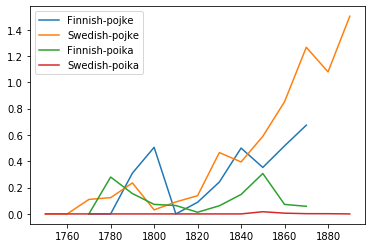

In [53]:
candidates_d = getFreqsDict(["pojke", "poika"])
plt.plot(finYears, candidates_d['pojke'][0], label="Finnish-pojke")
plt.plot(sweYears, candidates_d['pojke'][1], label="Swedish-pojke")
plt.plot(finYears, candidates_d['poika'][0], label="Finnish-poika")
plt.plot(sweYears, candidates_d['poika'][1], label="Swedish-poika")
plt.legend()

Here we see that the Finnosvenska uses the direct Finnish version 'poika' far more than Swedish texts, although both use the Swedish version 'pojke' more often. There is a compelling increase in the usage of pojke in Swedish texts just as Finnosvenska texts begin to use it in replacement of poika. So, as Swedish texts begin to use the Swedish version of the word, Finnosvenska texts significantly decrease their usage of 'poika.' It's hard to determine any sort of causal relationship without more etymological details, but this example suggests that ther is a marked relationship between the language of origin and the word's usage. 

## 4. Future Work
Comparing loanwords provides a good calibration for comparing word usage patterns across langauges. To go further with this analysis, we could search for words with the greatest difference in frequency across texts and use this to investigate dialectical differences. We could also create more detailed representation of content words by training word embeddings on subsets of the corpora and comparing their representations. 

For every experiment detailed above, we look only at the word frequencies of a newspaper publication. The next step in analyzing the text could be to look at syntatical differences in the publications. The original dataset contains Part-of-Speech and Named Entity tags, along with other annotations, that could be analyzed as well. However the tagging systems used in the SpråkbankenText platform are rather outdated. With the right time and resources, one ambitious project could be to fine-tune present state-of-the-art tagging systems on the Finnosvenska and Swedish texts. 

## 5. Conclusion

In conclusion, this project looked at the evolutionary trends of Finnosvenska and Swedish by performing both quantitative and qualitative analyses of word frequency within newspaper publications. We found that Finnish texts exhibited less evolution than their Swedish counterparts, but also adopted more words from the majority Finnish-speaking population. Clearly, cultural and geographic contexts create differences in the two languages, with far more possible avenues of comparison yet to explore. 